In [1]:
from scipy.io import loadmat
import numpy as np
import pandas as pd
from scipy.stats import multivariate_normal as mvn
import sys
import numpy as np
from scipy.stats import multivariate_normal as mvn
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import cv2
import sklearn.metrics

In [4]:
df = pd.read_csv('mnist234.csv')
df = df.drop(['Unnamed: 0'], axis=1)
df

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
596,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
597,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
598,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
x=df.iloc[:,1:]
x

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
596,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
597,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
598,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
y=df['label']
y

0      2
1      2
2      2
3      2
4      2
      ..
595    4
596    4
597    4
598    4
599    4
Name: label, Length: 600, dtype: int64

In [10]:
df.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,600.000000,600.0,600.0,600.0,600.0,600.0,600.0,600.0,600.0,600.0,...,600.0,600.0,600.0,600.0,600.0,600.0,600.0,600.0,600.0,600.0
mean,3.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,0.817178,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,3.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
x=x.apply(lambda x:((x)/128.0).astype(np.int))

/tmp/ipykernel_49460/2942418165.py:1: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  x=x.apply(lambda x:((x)/128.0).astype(np.int))


In [12]:
x.describe()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,600.0,600.0,600.0,600.0,600.0,600.0,600.0,600.0,600.0,600.0,...,600.0,600.0,600.0,600.0,600.0,600.0,600.0,600.0,600.0,600.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


2


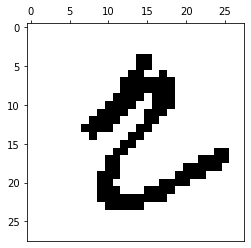

In [14]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
imgplot = ax.imshow(np.array(x.iloc[100]).reshape(28,28), cmap=plt.cm.Greys)
print(y.iloc[100])
imgplot.set_interpolation('nearest')
ax.xaxis.set_ticks_position('top')
ax.yaxis.set_ticks_position('left')
plt.show()

In [15]:
y.value_counts()

2    200
3    200
4    200
Name: label, dtype: int64

In [16]:
def Estep(X,mu,pi):
    N = X.shape[0]
    K = mu.shape[0]
    gamma = np.zeros((N, K),dtype=np.float128)
    
    for i in range(N):
        sum=np.float128(0)
        for k in range(K):
            gamma[i,k] = np.prod((mu[k]**X[i])*((1-mu[k])**(1-X[i])),dtype=np.float128)
    gamma=gamma*pi
    gamma = (gamma)/np.sum(gamma, axis=1, keepdims=True,dtype=np.float128)
    return gamma
    

In [17]:
def Mstep(X,gamma):
    N=X.shape[0]
    K=gamma.shape[1]
    D=X.shape[1]
    pi = np.sum(gamma, axis=0,dtype=np.float128)/N
    mu = np.empty((K, D),dtype=np.float128)
    Nk = np.sum(gamma, axis=0,dtype=np.float128)

    for k in range(K):
        mu[k, :] = np.sum(gamma[:, k].reshape(-1,1) * X, axis=0) / np.sum(gamma[:, k], keepdims=True)
   
    return mu,pi
   

In [18]:
def logLikelihood(X,gamma,mu,pi):
    N=X.shape[0]
    K=gamma.shape[1]
    llh=0
    for i in range(N):
        sum = 0
        for k in range(K):
            temp = ((mu[k]**X[i])*((1-mu[k])**(1-X[i])))
            temp = np.log(temp,dtype=np.float128)
            sum += gamma[i, k]*(np.log(pi[k],dtype=np.float128)+np.sum(temp))
        llh =llh+ sum
        
    return llh

In [19]:
def EM(df,K,delta=0.000000000001):
    X=df.to_numpy()
    N, D = X.shape
    mu = np.zeros((K,D))
    for i in range(0,K):
        mu_class_k = np.random.uniform(low = 0.25, high = 0.75, size = 784)
        mu_class_k = mu_class_k * 1.0/mu_class_k.sum()
        mu[i]=mu_class_k
    
    pi=np.random.uniform(.25,.75,K)
    tot=np.sum(pi)
    pi=pi/tot
    
    cur_llh = np.float(1e9)
    prev_llh=0.0
    iter=0
    while(abs(cur_llh-prev_llh)>delta):
        gamma=Estep(X,mu,pi)
        mu,pi=Mstep(X,gamma)
        iter=iter+1
        prev_llh=cur_llh
        cur_llh=logLikelihood(X,gamma,mu,pi)
        
    label = np.argmax(gamma,axis=1)
    print(iter)
    return mu,pi,label,gamma





In [21]:
K=3
mu,pi,label,gamma=EM(x,K)

/tmp/ipykernel_49460/2339873749.py:18: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  cur_llh = np.float(1e9)
/tmp/ipykernel_49460/2166080959.py:9: RuntimeWarning: divide by zero encountered in log
  temp = np.log(temp,dtype=np.float128)
/tmp/ipykernel_49460/2166080959.py:10: RuntimeWarning: invalid value encountered in longdouble_scalars
  sum += gamma[i, k]*(np.log(pi[k],dtype=np.float128)+np.sum(temp))


6


/home/melio/.local/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Casting input data from float128 to float64 for imshow
  fig.canvas.print_figure(bytes_io, **kw)


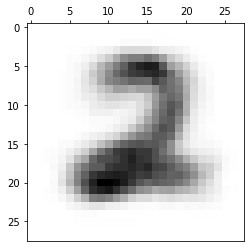

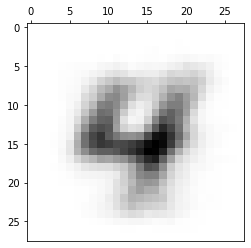

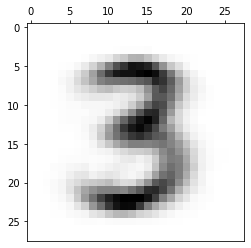

In [22]:
for i in range(0,K):
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    imgplot = ax.imshow(mu[i].reshape(28,28), cmap=plt.cm.Greys)
    imgplot.set_interpolation('nearest')
    ax.xaxis.set_ticks_position('top')
    ax.yaxis.set_ticks_position('left')
plt.show()

In [23]:
dict={
    0:2,
    1:4,
    2:3
}


In [24]:
y_pred=np.zeros(gamma.shape[0])
for i in range(0,gamma.shape[0]):
    y_pred[i]=dict[label[i]]

In [25]:
acc= sklearn.metrics.accuracy_score(y,y_pred)
acc

0.905

In [26]:
Misclassified_points=(1-acc)*20000
Misclassified_points

1899.9999999999995

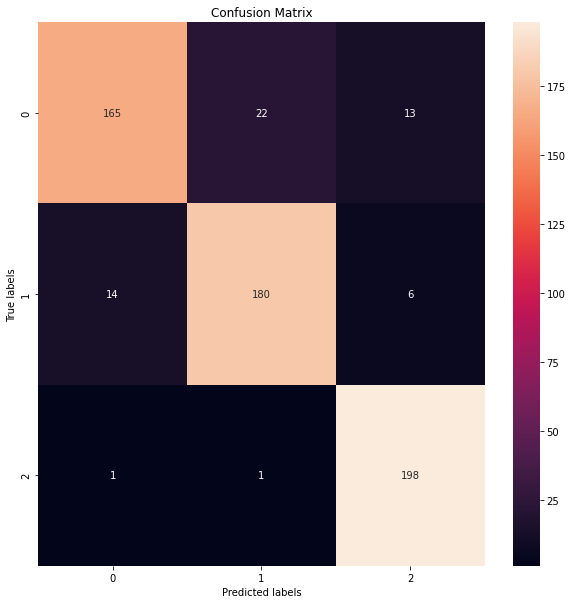

In [27]:
confusionMat=sklearn.metrics.confusion_matrix(y,y_pred)
confusionMat
ax= plt.subplots(figsize=(10,10))

ax=sns.heatmap(confusionMat, annot=True, fmt='g');  #annot=True to annotate cells, ftm='g' to disable scientific notation

ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 